In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [27]:
car_data = pd.read_csv("car data.csv")

In [28]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [30]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [31]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
car_data['Car_Name'].describe()

count      301
unique      98
top       city
freq        26
Name: Car_Name, dtype: object

<Axes: >

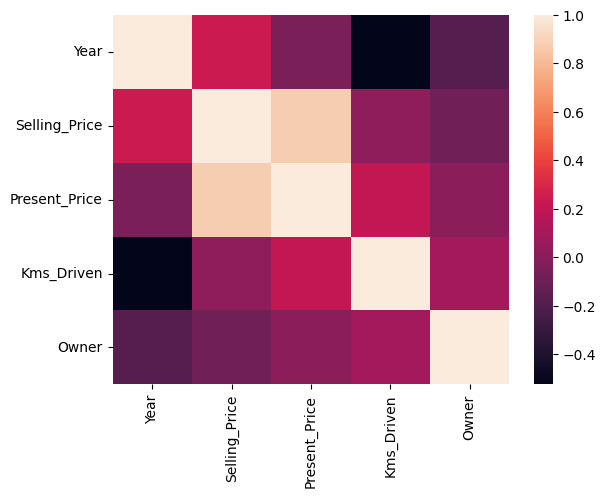

In [34]:
numeric = car_data.iloc[:,[1,2,3,4,8]]
sns.heatmap(numeric.corr())

In [39]:
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())
print(car_data['Car_Name'].value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
0    261
1     40
Name: count, dtype: int64
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [40]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [44]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [45]:
car_data = car_data.drop(['Car_Name'],axis=1)

<Axes: >

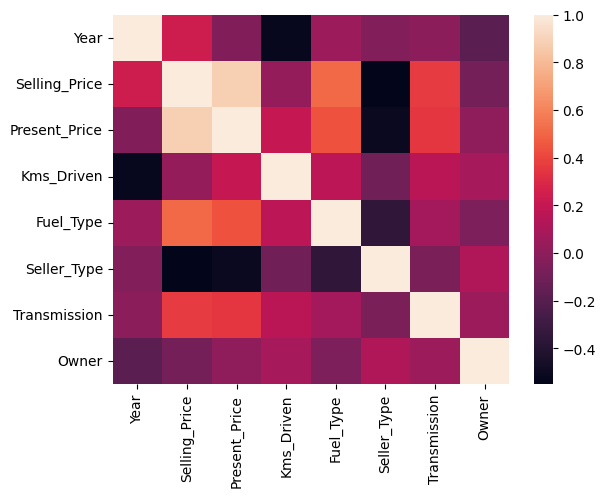

In [46]:
sns.heatmap(car_data.corr())

In [47]:
x = car_data.drop(['Selling_Price'],axis=1)
y = car_data['Selling_Price']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [54]:
def display_result(model):
    coefs = [model.intercept_]
    coefs += list[model.coef_]
    y_train_predict = model.predict(x_train)
    y_test_predict  = model.predict(x_test)
    
    train_error = np.sqrt(mean_squared_error(y_train,y_train_predict))
    test_error  = np.sqrt(mean_squared_error(y_test,y_test_predict))
    
    print('Training error (rmse):',train_error)
    print('Testing error (rmse):',test_error)
    
    plt.scatter(y_train,y_train_predict, marker='o',label='Train Predictions')
    plt.scatter(y_test,y_test_predict, marker='^',label='Test Prediction')
    
    plt.xlabel('True Values')
    plt.ylabel('Prediction')
    plt.title('True vs Predicted values')
    plt.legend()
    plt.show()
    
    print('Coefficients:')
    print(coefs)

In [51]:
lin_reg_model =LinearRegression()

In [56]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Training error (rmse): 1.7918704437854567
Testing error (rmse): 1.5871125695256345


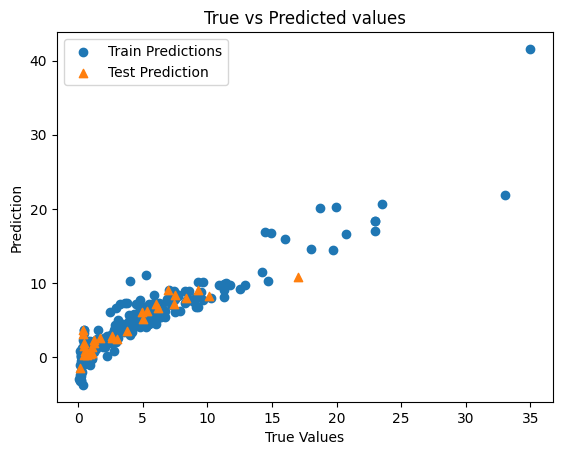

Coefficients:
[-812.823697861524, *list[array([ 4.04362972e-01,  4.37529741e-01, -6.38670257e-06,  1.60717941e+00,
       -1.02840184e+00,  1.68038288e+00, -8.03719979e-01])]]


In [57]:
display_result(lin_reg_model)

In [58]:
lasso_reg_model = Lasso()

In [59]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

Training error (rmse): 2.0503504697663506
Testing error (rmse): 1.5484932445075412


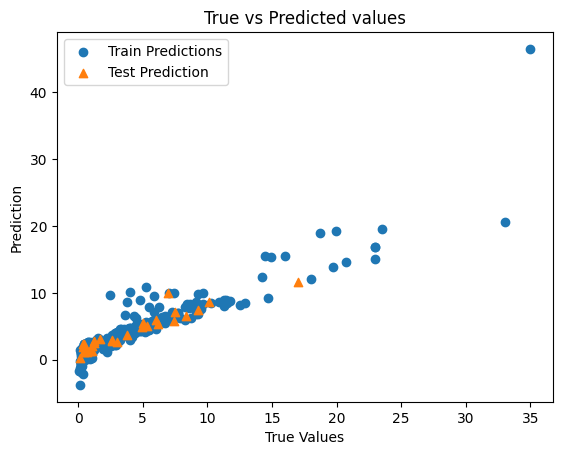

Coefficients:
[-671.1815606257097, *list[array([ 3.33832725e-01,  5.09139074e-01, -6.38920803e-06,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00])]]


In [60]:
display_result(lasso_reg_model)

In [62]:
rid_reg_model = Ridge()

In [63]:
rid_reg_model.fit(x_train,y_train)

Ridge()

Training error (rmse): 1.792107492358516
Testing error (rmse): 1.5740341832799598


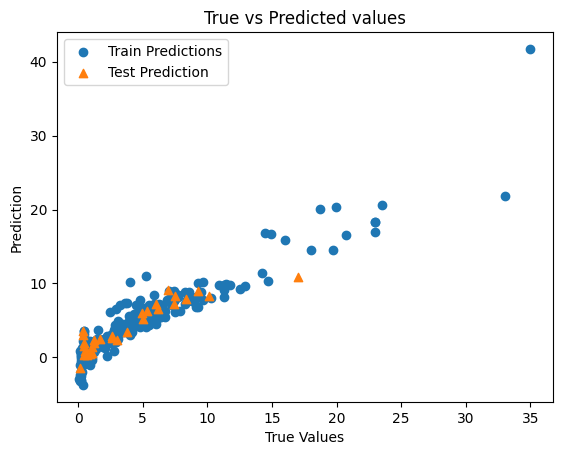

Coefficients:
[-817.6981146541548, *list[array([ 4.06776458e-01,  4.39830634e-01, -6.22026331e-06,  1.56495220e+00,
       -1.00787743e+00,  1.61046551e+00, -7.61694848e-01])]]


In [64]:
display_result(rid_reg_model)

In [ ]:
input_data = (100,300,200,500,350,250)

input_data_as_numpy_arry = np.asarray(input_data)

input_data_reshaped